<a href="https://colab.research.google.com/github/RushilPatel0703/DAE_Project/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE, SMOTENC

In [2]:
url1 = 'https://raw.githubusercontent.com/RushilPatel0703/DAE_Project/main/eth_illicit_features.csv'
data_1 = pd.read_csv(url1)

url2 = 'https://raw.githubusercontent.com/RushilPatel0703/DAE_Project/main/transaction_dataset.csv'
data_2 = pd.read_csv(url2)

In [3]:
#pd.set_option('max_columns', None)
#pd.set_option('max_rows', None)
#pd.reset_option('max_columns')
pd.reset_option('max_rows')

In [4]:
data_1

,address,flag,minTimeBetweenSentTnx,maxTimeBetweenSentTnx,avgTimeBetweenSentTnx,minTimeBetweenRecTnx,maxTimeBetweenRecTnx,avgTimeBetweenRecTnx,lifetime,sentTransactions,...,totalEtherBalance,activityDays,dailyMax,ratioRecSent,ratioSentTotal,ratioRecTotal,giniSent,giniRec,txFreq,stdBalanceEth
0,0xd0cc2b24980cbcca47ef755da88b220a82291407,1,0.0,2387389.0,5.807655e+04,89.0,1.501076e+09,7.148260e+07,46,66,...,0.291940,10,60,0.313433,0.750000,0.238636,0.969121,0.888782,1.891304,147.701484
1,0x4cdc1cba0aeb5539f2e0ba158281e67e0e54a9b1,1,0.0,0.0,0.000000e+00,3021091.0,1.502802e+09,7.529115e+08,35,0,...,0.013541,2,1,2.000000,0.000000,0.666667,0.000000,0.238480,0.057143,0.005000
2,0x00e01a648ff41346cdeb873182383333d2184dd1,1,37.0,25112882.0,1.710279e+06,0.0,1.500397e+09,6.820612e+07,299,15,...,0.266494,14,16,1.375000,0.394737,0.578947,0.465450,0.614205,0.123746,52.129575
3,0x858457daa7e087ad74cdeeceab8419079bc2ca03,1,0.0,642460.0,1.576106e+04,0.0,1.500037e+09,1.352571e+07,36,109,...,0.007419,36,67,1.009091,0.493213,0.502262,0.957906,0.794121,6.111111,233.689231
4,0x240e125c20a4cc84bd6e7f8d1fd07aff4c06d43d,1,0.0,0.0,0.000000e+00,3894.0,1.500402e+09,3.751409e+08,82,1,...,0.002199,3,3,2.000000,0.166667,0.666667,0.000000,0.406556,0.060976,0.757788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12141,0x38e404b6ca4549988ced1d065330f1f722787924,0,3.0,15139.0,1.186571e+03,698.0,1.656129e+09,1.275572e+08,25,14,...,0.009248,24,4,0.866667,0.500000,0.464286,0.643490,0.615051,1.080000,0.236468
12142,0x8f40dac94ac52f90218d9aa5e605fe39dabe3979,0,0.0,411419.0,2.206761e+04,0.0,1.648939e+09,8.295712e+07,149,119,...,-1.600064,136,3,0.166667,0.850000,0.142857,0.856372,0.289923,0.932886,0.617016
12143,0xb92027b6adee9f63290a5a1bd9d15d6a163f4012,0,0.0,0.0,0.000000e+00,0.0,4.086570e+05,7.712044e+03,48,0,...,0.000000,41,296,528.000000,0.000000,0.996226,0.000000,0.000000,11.020833,0.000000
12144,0x0cd3724542af4be8243eba3f560c0c55c5abd1df,0,0.0,2003867.0,1.412816e+05,223.0,1.647548e+09,1.033063e+08,156,59,...,-0.364932,69,6,0.266667,0.776316,0.210526,0.907248,0.571522,0.480769,0.161996


In [5]:
data_2

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,9836,2175,0xff481ca14e6c16b79fc8ab299b4d2387ec8ecdd2,1,12635.10,631.39,58748.48,4,13,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,2.0,,GSENetwork
9837,9837,2176,0xff718805bb9199ebf024ab6acd333e603ad77c85,1,0.00,0.00,0.00,0,0,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,1.0,,Blockwell say NOTSAFU
9838,9838,2177,0xff8e6af02d41a576a0c82f7835535193e1a6bccc,1,2499.44,2189.29,261601.88,67,43,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,5.0,,Free BOB Tokens - BobsRepair.com
9839,9839,2178,0xffde23396d57e10abf58bd929bb1e856c7718218,1,0.00,0.00,0.00,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1. Data Cleaning and Munching

In [6]:
# dropping columns not in common with data_2
data_1.drop(['minTimeBetweenSentTnx', 'maxTimeBetweenSentTnx', 'minTimeBetweenRecTnx', 'maxTimeBetweenRecTnx', 'lifetime', 'activityDays',
       'dailyMax', 'ratioRecSent', 'ratioSentTotal', 'ratioRecTotal',
       'giniSent', 'giniRec', 'txFreq', 'stdBalanceEth'], inplace=True, axis=1)

In [7]:
data_1.columns


Index(['address', 'flag', 'avgTimeBetweenSentTnx', 'avgTimeBetweenRecTnx',
       'sentTransactions', 'receivedTransactions', 'createdContracts',
       'numUniqSentAddress', 'numUniqRecAddress', 'minValSent', 'maxValSent',
       'avgValSent', 'minValReceived', 'maxValReceived', 'avgValReceived',
       'totalTransactions', 'totalEtherSent', 'totalEtherReceived',
       'totalEtherSentContracts', 'totalEtherBalance'],
      dtype='object')

In [8]:
# dropping columns not in common with data_1
data_2.drop(['Unnamed: 0', 'Index', 'Time Diff between first and last (Mins)',
       'min value sent to contract', 'max val sent to contract', 'avg value sent to contract',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec contract addr',
       ' ERC20 avg time between sent tnx', ' ERC20 avg time between rec tnx',
       ' ERC20 avg time between rec 2 tnx',
       ' ERC20 avg time between contract tnx', ' ERC20 min val rec',
       ' ERC20 max val rec', ' ERC20 avg val rec', ' ERC20 min val sent',
       ' ERC20 max val sent', ' ERC20 avg val sent',
       ' ERC20 min val sent contract', ' ERC20 max val sent contract',
       ' ERC20 avg val sent contract', ' ERC20 uniq sent token name',
       ' ERC20 uniq rec token name', ' ERC20 most sent token type',
       ' ERC20_most_rec_token_type'], inplace=True, axis=1)

In [9]:
data_2.columns

Index(['Address', 'FLAG', 'Avg min between sent tnx',
       'Avg min between received tnx', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance'],
      dtype='object')

In [10]:
# renaming columns to column names in data_1 for ease of
data_2.rename(columns= {'Address':'address', 'FLAG':'flag', 'Avg min between sent tnx':'avgTimeBetweenSentTnx',
                        'Avg min between received tnx':'avgTimeBetweenRecTnx', 'Sent tnx':'sentTransactions',
                        'Received Tnx':'receivedTransactions', 'Number of Created Contracts':'createdContracts',
                        'Unique Received From Addresses':'numUniqRecAddress', 'Unique Sent To Addresses':'numUniqSentAddress',
                        'min value received':'minValReceived','max value received ':'maxValReceived',
                        'avg val received':'avgValReceived', 'min val sent':'minValSent', 'max val sent':'maxValSent',
                        'avg val sent': 'avgValSent', 'total transactions (including tnx to create contract':'totalTransactions',
                        'total Ether sent':'totalEtherSent', 'total ether received':'totalEtherReceived',
                        'total ether sent contracts':'totalEtherSentContracts', 'total ether balance':'totalEtherBalance'}, inplace=True)

In [11]:
df = pd.concat([data_1, data_2]) # combine data_1 and data_2

In [12]:
df.columns

Index(['address', 'flag', 'avgTimeBetweenSentTnx', 'avgTimeBetweenRecTnx',
       'sentTransactions', 'receivedTransactions', 'createdContracts',
       'numUniqSentAddress', 'numUniqRecAddress', 'minValSent', 'maxValSent',
       'avgValSent', 'minValReceived', 'maxValReceived', 'avgValReceived',
       'totalTransactions', 'totalEtherSent', 'totalEtherReceived',
       'totalEtherSentContracts', 'totalEtherBalance'],
      dtype='object')

In [13]:
df = df.drop('address', axis=1)

In [14]:
df # final dataset to use

,flag,avgTimeBetweenSentTnx,avgTimeBetweenRecTnx,sentTransactions,receivedTransactions,createdContracts,numUniqSentAddress,numUniqRecAddress,minValSent,maxValSent,avgValSent,minValReceived,maxValReceived,avgValReceived,totalTransactions,totalEtherSent,totalEtherReceived,totalEtherSentContracts,totalEtherBalance
0,1,5.807655e+04,7.148260e+07,66,21,0,47,17,0.000000,183.0,5.559412,0.018779,266.000000,17.486340,87,366.921190,367.213130,0.0,0.291940
1,1,0.000000e+00,7.529115e+08,0,2,0,0,2,0.000000,0.0,0.000000,0.003541,0.010000,0.006771,2,0.000000,0.013541,0.0,0.013541
2,1,1.710279e+06,6.820612e+07,15,22,0,13,21,0.000000,25.0,13.330000,0.425099,49.999314,9.100750,37,199.950000,200.216494,0.0,0.266494
3,1,1.576106e+04,1.352571e+07,109,111,0,54,104,0.000000,680.0,14.959358,0.010000,193.500000,14.689887,220,1630.570000,1630.577419,0.0,0.007419
4,1,0.000000e+00,3.751409e+08,1,4,0,1,4,1.900000,1.9,1.900000,0.002199,1.000000,0.475550,5,1.900000,1.902199,0.0,0.002199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,1,1.263510e+04,6.313900e+02,4,13,0,4,11,0.465461,12.2,9.166365,0.004082,12.000000,2.821060,17,36.665461,36.673777,0.0,0.008316
9837,1,0.000000e+00,0.000000e+00,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.0,0.000000
9838,1,2.499440e+03,2.189290e+03,67,43,0,44,31,0.004000,9.5,0.922179,0.001078,21.310000,1.234192,110,61.785995,53.070252,0.0,-8.715743
9839,1,0.000000e+00,0.000000e+00,0,1,0,0,1,0.000000,0.0,0.000000,0.500000,0.500000,0.500000,1,0.000000,0.500000,0.0,0.500000


In [15]:
df.isnull().sum() # check for msiing vals

flag                       0
avgTimeBetweenSentTnx      0
avgTimeBetweenRecTnx       0
sentTransactions           0
receivedTransactions       0
createdContracts           0
numUniqSentAddress         0
numUniqRecAddress          0
minValSent                 0
maxValSent                 0
avgValSent                 0
minValReceived             0
maxValReceived             0
avgValReceived             0
totalTransactions          0
totalEtherSent             0
totalEtherReceived         0
totalEtherSentContracts    0
totalEtherBalance          0
dtype: int64

In [16]:
df.duplicated().sum()

1083

In [17]:
df.drop_duplicates(inplace=True) #removing null values
df.duplicated().sum()

0

In [18]:
df.skew(axis = 0, skipna = True).sort_values() # check skewness of all data

totalEtherBalance           -3.147711
flag                         0.807057
avgTimeBetweenRecTnx         2.550495
totalTransactions            3.332327
receivedTransactions         4.557013
sentTransactions             5.434781
numUniqRecAddress            6.595252
numUniqSentAddress          12.248233
avgTimeBetweenSentTnx       21.278810
minValReceived              45.818812
avgValSent                  52.301321
maxValReceived              57.045491
createdContracts            61.607631
maxValSent                  71.921411
totalEtherReceived          82.023726
totalEtherSent              82.205136
avgValReceived              96.031423
minValSent                  96.577247
totalEtherSentContracts    144.185342
dtype: float64

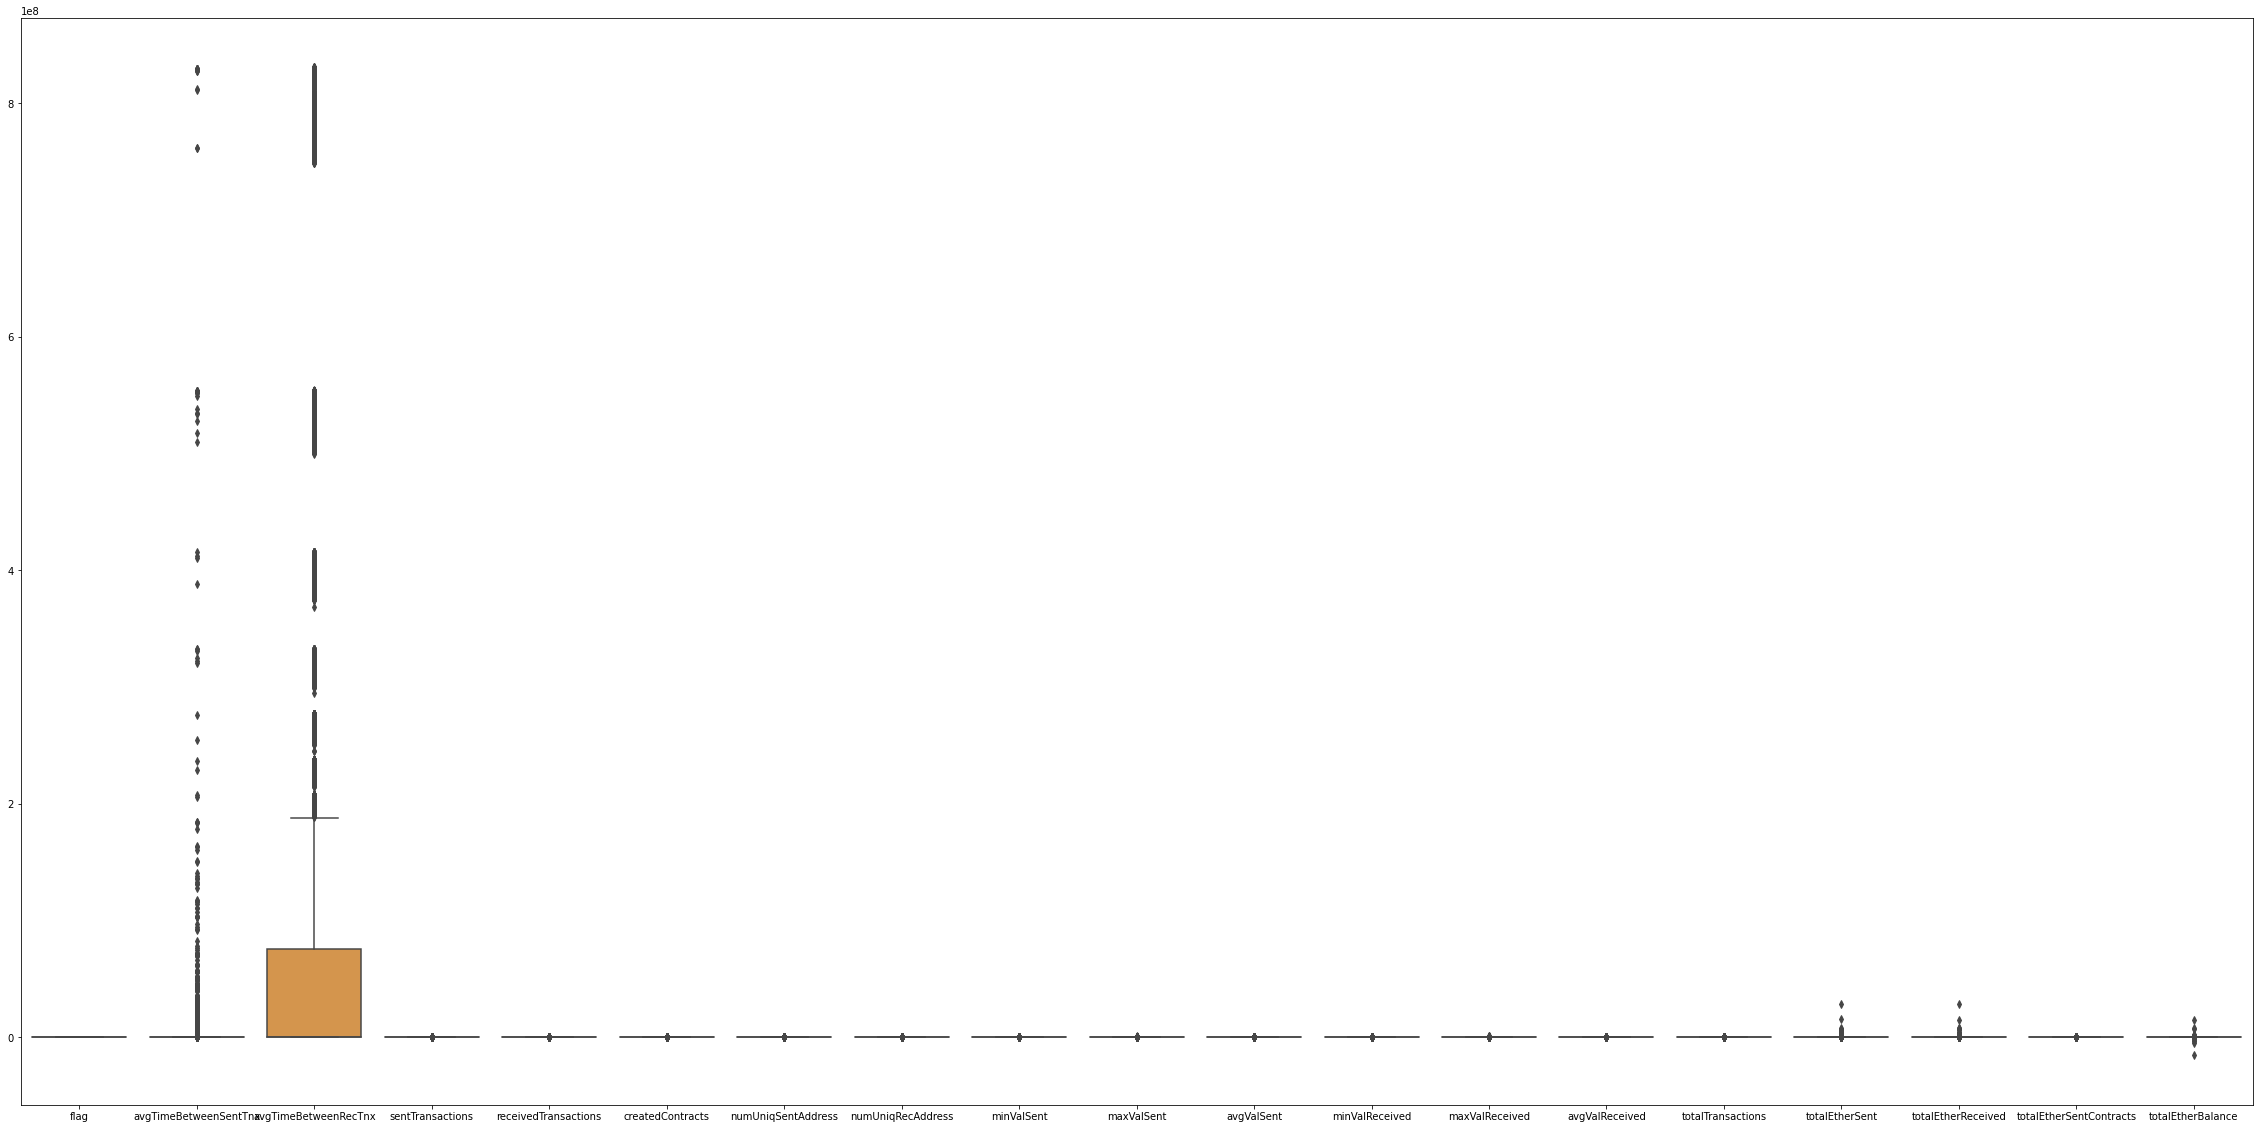

In [19]:
plt.figure(figsize=(40, 20))
sns.boxplot(data=df)

In [20]:
X = df.drop('flag',axis=1)
y = df['flag']

In [21]:
df2 = X.copy()
from scipy import stats

# data transformation to handle the outliers called box cox
# makes a better distribution of the data so that outliers have minimal impact on our ml model

for col in df2:
  if df2[col].dtypes == 'int64' or df2[col].dtypes == 'float64':
    posdata = df2[col][df2[col] > 0]
    col_data, fitted_lambda = stats.boxcox(posdata)
    df2.loc[df2[col] > 0, col] = col_data
df_final = df2.copy()

In [22]:
df_final.skew(axis = 0, skipna = True).sort_values()

totalEtherBalance         -111.319153
totalEtherSentContracts    -31.731586
minValSent                  -0.704765
minValReceived              -0.458196
avgValReceived               0.029058
avgValSent                   0.032683
maxValReceived               0.047367
avgTimeBetweenRecTnx         0.102899
totalEtherReceived           0.115627
totalTransactions            0.152442
receivedTransactions         0.156258
numUniqRecAddress            0.220305
avgTimeBetweenSentTnx        0.284837
maxValSent                   0.287674
sentTransactions             0.417394
totalEtherSent               0.464868
numUniqSentAddress           0.511664
createdContracts             9.755377
dtype: float64

In [23]:
df_final

,avgTimeBetweenSentTnx,avgTimeBetweenRecTnx,sentTransactions,receivedTransactions,createdContracts,numUniqSentAddress,numUniqRecAddress,minValSent,maxValSent,avgValSent,minValReceived,maxValReceived,avgValReceived,totalTransactions,totalEtherSent,totalEtherReceived,totalEtherSentContracts,totalEtherBalance
0,12.056032,28.732089,2.767136,2.277306,0.0,2.068096,1.789808,0.000000,5.395317,1.755322,-4.245963,5.527766,2.955836,3.069515,6.708273,6.236011,0.0,-1.275377
1,0.000000,34.644975,0.000000,0.647039,0.0,0.000000,0.614761,0.000000,0.000000,0.000000,-6.199784,-4.643547,-4.723836,0.651673,0.000000,-4.137451,0.0,-4.874525
2,16.249311,28.620886,2.055603,2.302419,0.0,1.665683,1.864600,0.000000,3.289190,2.681522,-0.867555,3.884597,2.264315,2.655636,5.938819,5.564157,0.0,-1.373447
3,10.502432,24.934859,2.961306,3.044820,0.0,2.101320,2.281148,0.000000,6.815099,2.805276,-4.971407,5.215700,2.770315,3.452131,8.684840,7.919229,0.0,-5.656469
4,0.000000,32.825674,0.000000,1.209948,0.0,0.000000,1.095928,0.653369,0.644618,0.647376,-6.777635,0.000000,-0.737084,1.397393,0.650648,0.646799,0.0,-7.320716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9831,5.505160,4.902241,1.488396,1.209948,0.0,1.315300,0.910421,-1.127440,1.973442,0.553243,-10.753967,2.107385,0.965216,1.885242,2.460813,2.391886,0.0,-7.516641
9834,0.000000,4.289619,0.000000,2.088500,0.0,0.000000,1.742800,2.949857,2.783365,2.834796,-4.173981,1.604785,0.024778,2.183075,2.897044,2.802124,0.0,-9.780506
9836,10.242487,7.551445,1.199667,2.004251,0.0,1.088025,1.616945,-0.748799,2.543763,2.282274,-6.029075,2.473828,1.049346,2.219690,3.890759,3.723108,0.0,-5.506095
9838,8.366534,9.294720,2.773264,2.639320,0.0,2.051713,1.988630,-4.758856,2.285538,-0.080929,-7.659385,3.042396,0.210917,3.172370,4.505260,4.119110,0.0,-8.715743


In [53]:
df_final.var() #checking variance of each feature

avgTimeBetweenSentTnx      3.340610e+01
avgTimeBetweenRecTnx       1.565955e+02
sentTransactions           1.625405e+00
receivedTransactions       1.472633e+00
createdContracts           1.907506e-04
numUniqSentAddress         6.624626e-01
numUniqRecAddress          5.988671e-01
minValSent                 4.065197e+00
maxValSent                 7.135298e+00
avgValSent                 7.019948e+00
minValReceived             1.281376e+01
maxValReceived             7.882117e+00
avgValReceived             8.264713e+00
totalTransactions          1.317876e+00
totalEtherSent             1.210168e+01
totalEtherReceived         1.094199e+01
totalEtherSentContracts    1.802637e-02
totalEtherBalance          1.444506e+10
dtype: float64

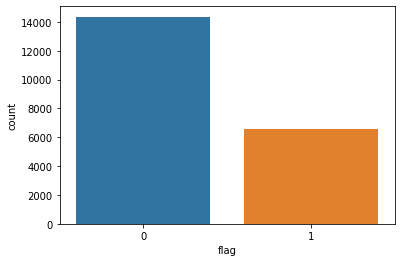

In [25]:
sns.countplot(x="flag", data=df) # We notice a bias in our dataset where there are more samples with no fraud then frauds

In [26]:
X_t = df_final.copy()
X_t

,avgTimeBetweenSentTnx,avgTimeBetweenRecTnx,sentTransactions,receivedTransactions,createdContracts,numUniqSentAddress,numUniqRecAddress,minValSent,maxValSent,avgValSent,minValReceived,maxValReceived,avgValReceived,totalTransactions,totalEtherSent,totalEtherReceived,totalEtherSentContracts,totalEtherBalance
0,12.056032,28.732089,2.767136,2.277306,0.0,2.068096,1.789808,0.000000,5.395317,1.755322,-4.245963,5.527766,2.955836,3.069515,6.708273,6.236011,0.0,-1.275377
1,0.000000,34.644975,0.000000,0.647039,0.0,0.000000,0.614761,0.000000,0.000000,0.000000,-6.199784,-4.643547,-4.723836,0.651673,0.000000,-4.137451,0.0,-4.874525
2,16.249311,28.620886,2.055603,2.302419,0.0,1.665683,1.864600,0.000000,3.289190,2.681522,-0.867555,3.884597,2.264315,2.655636,5.938819,5.564157,0.0,-1.373447
3,10.502432,24.934859,2.961306,3.044820,0.0,2.101320,2.281148,0.000000,6.815099,2.805276,-4.971407,5.215700,2.770315,3.452131,8.684840,7.919229,0.0,-5.656469
4,0.000000,32.825674,0.000000,1.209948,0.0,0.000000,1.095928,0.653369,0.644618,0.647376,-6.777635,0.000000,-0.737084,1.397393,0.650648,0.646799,0.0,-7.320716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9831,5.505160,4.902241,1.488396,1.209948,0.0,1.315300,0.910421,-1.127440,1.973442,0.553243,-10.753967,2.107385,0.965216,1.885242,2.460813,2.391886,0.0,-7.516641
9834,0.000000,4.289619,0.000000,2.088500,0.0,0.000000,1.742800,2.949857,2.783365,2.834796,-4.173981,1.604785,0.024778,2.183075,2.897044,2.802124,0.0,-9.780506
9836,10.242487,7.551445,1.199667,2.004251,0.0,1.088025,1.616945,-0.748799,2.543763,2.282274,-6.029075,2.473828,1.049346,2.219690,3.890759,3.723108,0.0,-5.506095
9838,8.366534,9.294720,2.773264,2.639320,0.0,2.051713,1.988630,-4.758856,2.285538,-0.080929,-7.659385,3.042396,0.210917,3.172370,4.505260,4.119110,0.0,-8.715743


### 2. LR Model with skew adjusted data

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_t, y,train_size=0.8, random_state=1)

In [28]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [29]:
clf.score(X_train, y_train)

0.801889613107696

In [30]:
pred = clf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      2869
           1       0.75      0.56      0.64      1312

    accuracy                           0.80      4181
   macro avg       0.78      0.74      0.75      4181
weighted avg       0.80      0.80      0.79      4181



### 3. LR Model with no adjustment to data

In [31]:
df

,flag,avgTimeBetweenSentTnx,avgTimeBetweenRecTnx,sentTransactions,receivedTransactions,createdContracts,numUniqSentAddress,numUniqRecAddress,minValSent,maxValSent,avgValSent,minValReceived,maxValReceived,avgValReceived,totalTransactions,totalEtherSent,totalEtherReceived,totalEtherSentContracts,totalEtherBalance
0,1,5.807655e+04,7.148260e+07,66,21,0,47,17,0.000000,183.000000,5.559412,0.018779,266.000000,17.486340,87,366.921190,367.213130,0.0,0.291940
1,1,0.000000e+00,7.529115e+08,0,2,0,0,2,0.000000,0.000000,0.000000,0.003541,0.010000,0.006771,2,0.000000,0.013541,0.0,0.013541
2,1,1.710279e+06,6.820612e+07,15,22,0,13,21,0.000000,25.000000,13.330000,0.425099,49.999314,9.100750,37,199.950000,200.216494,0.0,0.266494
3,1,1.576106e+04,1.352571e+07,109,111,0,54,104,0.000000,680.000000,14.959358,0.010000,193.500000,14.689887,220,1630.570000,1630.577419,0.0,0.007419
4,1,0.000000e+00,3.751409e+08,1,4,0,1,4,1.900000,1.900000,1.900000,0.002199,1.000000,0.475550,5,1.900000,1.902199,0.0,0.002199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9831,1,1.930900e+02,8.182000e+01,6,4,0,6,3,0.312210,7.013525,1.731872,0.000100,8.293050,2.598288,10,10.391234,10.393150,0.0,0.001916
9834,1,0.000000e+00,4.951000e+01,1,15,0,1,15,15.375782,15.375782,15.375782,0.020005,5.000000,1.025080,16,15.375782,15.376202,0.0,0.000420
9836,1,1.263510e+04,6.313900e+02,4,13,0,4,11,0.465461,12.200000,9.166365,0.004082,12.000000,2.821060,17,36.665461,36.673777,0.0,0.008316
9838,1,2.499440e+03,2.189290e+03,67,43,0,44,31,0.004000,9.500000,0.922179,0.001078,21.310000,1.234192,110,61.785995,53.070252,0.0,-8.715743


In [32]:
X_wt = df.drop(['flag'],axis=1)
y_wt = df['flag']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_wt, y_wt,train_size=0.8, random_state=1)

In [33]:
clf2 = LogisticRegression(random_state=0).fit(X_train2, y_train2)

In [34]:
clf2.score(X_train2, y_train2)

0.6956287747413742

In [35]:
pred = clf2.predict(X_test2)
print(classification_report(y_test2, pred))

              precision    recall  f1-score   support

           0       0.74      0.84      0.79      2869
           1       0.50      0.36      0.42      1312

    accuracy                           0.69      4181
   macro avg       0.62      0.60      0.60      4181
weighted avg       0.66      0.69      0.67      4181



### 4. LR Model with data standardization

In [36]:
# we standardize the data with StandardScaler we basically just does z = (x-mean)/standard deviation
standardizer = StandardScaler()
standardized_data = standardizer.fit_transform(df)

df_standard = pd.DataFrame(standardized_data, columns=df.columns)

In [37]:
df_standard 


,flag,avgTimeBetweenSentTnx,avgTimeBetweenRecTnx,sentTransactions,receivedTransactions,createdContracts,numUniqSentAddress,numUniqRecAddress,minValSent,maxValSent,avgValSent,minValReceived,maxValReceived,avgValReceived,totalTransactions,totalEtherSent,totalEtherReceived,totalEtherSentContracts,totalEtherBalance
0,1.481837,-0.065603,-0.108811,-0.188676,-0.243214,-0.022009,-0.045215,-0.178616,-0.027551,-0.009516,-0.080123,-0.064022,-0.012173,-0.020644,-0.301667,-0.024214,-0.026824,-0.007954,-0.003536
1,1.481837,-0.067449,3.413442,-0.231746,-0.253480,-0.022009,-0.137492,-0.195475,-0.027551,-0.037771,-0.100020,-0.064058,-0.036582,-0.026809,-0.336222,-0.025649,-0.028270,-0.007954,-0.003538
2,1.481837,-0.013094,-0.125747,-0.221957,-0.242674,-0.022009,-0.111969,-0.174121,-0.027551,-0.033911,-0.052312,-0.063059,-0.031994,-0.023601,-0.321993,-0.024867,-0.027482,-0.007954,-0.003536
3,1.481837,-0.066948,-0.408385,-0.160615,-0.194590,-0.022009,-0.031472,-0.080838,-0.027551,0.067220,-0.046481,-0.064042,-0.018826,-0.021630,-0.247600,-0.019274,-0.021846,-0.007954,-0.003538
4,1.481837,-0.067449,1.460775,-0.231093,-0.252399,-0.022009,-0.135529,-0.193227,-0.018566,-0.037478,-0.093220,-0.064061,-0.036491,-0.026643,-0.335002,-0.025641,-0.028263,-0.007954,-0.003538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20899,1.481837,-0.067443,-0.478298,-0.227830,-0.252399,-0.022009,-0.125712,-0.194351,-0.026075,-0.036688,-0.093822,-0.064066,-0.035822,-0.025895,-0.332969,-0.025608,-0.028229,-0.007954,-0.003538
20900,1.481837,-0.067449,-0.478299,-0.231093,-0.246456,-0.022009,-0.135529,-0.180864,0.045167,-0.035397,-0.044990,-0.064019,-0.036124,-0.026449,-0.330530,-0.025588,-0.028210,-0.007954,-0.003538
20901,1.481837,-0.067048,-0.478296,-0.229135,-0.247537,-0.022009,-0.129639,-0.185360,-0.025350,-0.035887,-0.067214,-0.064056,-0.035481,-0.025816,-0.330124,-0.025505,-0.028126,-0.007954,-0.003538
20902,1.481837,-0.067370,-0.478288,-0.188023,-0.231328,-0.022009,-0.051105,-0.162882,-0.027533,-0.036304,-0.096720,-0.064063,-0.034627,-0.026376,-0.292317,-0.025407,-0.028061,-0.007954,-0.003588


In [38]:
X_stand = df_standard.drop(['flag'],axis=1)
y_stand = df['flag']
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_stand, y_stand,train_size=0.8, random_state=1)

In [39]:
clf3 = LogisticRegression(random_state=0).fit(X_train3, y_train3)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [40]:
clf3.score(X_train3, y_train3)

0.6986186688991209

In [41]:
pred3 = clf3.predict(X_test3)
print(classification_report(y_test3, pred3))

              precision    recall  f1-score   support

           0       0.71      0.94      0.81      2869
           1       0.56      0.15      0.24      1312

    accuracy                           0.70      4181
   macro avg       0.63      0.55      0.53      4181
weighted avg       0.66      0.70      0.63      4181



### 5. LR Model with Imbalance correction with SMOTE

In [42]:
# we will use SMOTE to artificially generate data points to fix the imbalance noticed earlier
# this will only be applied to the training data

X_new = df.drop(['flag'],axis=1)
y_new = df['flag']
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_new, y_new,train_size=0.8, random_state=1)

smote = SMOTE(random_state=42, k_neighbors=2)
X_train4_new, y_train4_new = smote.fit_resample(X_train4,y_train4)

In [43]:
clf4 = LogisticRegression(random_state=0).fit(X_train4_new, y_train4_new)

In [44]:
clf4.score(X_train4_new, y_train4_new)

0.6540368888115539

In [45]:
pred4 = clf4.predict(X_test4)
print(classification_report(y_test4, pred4))

              precision    recall  f1-score   support

           0       0.78      0.73      0.75      2869
           1       0.48      0.55      0.52      1312

    accuracy                           0.67      4181
   macro avg       0.63      0.64      0.64      4181
weighted avg       0.69      0.67      0.68      4181



### 6. LR Model with Imbalance correction with SMOTE-NC

In [48]:
# we will use SMOTE-NC to artificially generate data points to fix the imbalance noticed earlier
# this will only be applied to the training data

X_new2 = df.drop(['flag'],axis=1)
y_new2 = df['flag']
X_train5, X_test5, y_train5, y_test5 = train_test_split(X_new2, y_new2,train_size=0.8, random_state=1)

smote_nc = SMOTENC(random_state=42, k_neighbors=2, categorical_features=[0])
X_train5_new, y_train5_new = smote_nc.fit_resample(X_train4,y_train4)

In [49]:
clf5 = LogisticRegression(random_state=0).fit(X_train5_new, y_train5_new)

In [50]:
clf5.score(X_train5_new, y_train5_new)

0.6610840438489647

In [51]:
pred5 = clf5.predict(X_test5)
print(classification_report(y_test5, pred5))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79      2869
           1       0.54      0.48      0.51      1312

    accuracy                           0.71      4181
   macro avg       0.66      0.65      0.65      4181
weighted avg       0.70      0.71      0.70      4181



### 7. LR Model with all above data transformations and manipulation

In [147]:
#df_final is already skew adjusted from section 1 so here we standardize that dataset
standardizer = StandardScaler()
standardized_data2 = standardizer.fit_transform(df_final)

df_final2 = pd.DataFrame(standardized_data2, columns=df_final.columns)

In [154]:
X_f = df_final2.copy()
y_f = df['flag']

In [163]:
# Correct imabalance with SMOTE
X_train6, X_test6, y_train6, y_test6 = train_test_split(X_f, y_f,train_size=0.85, random_state=1)

#smote_nc = SMOTENC(random_state=42, k_neighbors=2, categorical_features=[0])
#X_train6_new, y_train6_new = smote_nc.fit_resample(X_train6,y_train6)

smote = SMOTE(random_state=42, k_neighbors=2) #SMOTE gave better results then SMOTENC
X_train6_new, y_train6_new = smote.fit_resample(X_train6,y_train6)

In [164]:
# do Logistic regression
clf6 = LogisticRegression(random_state=0).fit(X_train6_new, y_train6_new)

In [165]:
clf6.score(X_train6_new, y_train6_new)

0.7961976563140212

In [166]:
pred6 = clf6.predict(X_test6)
print(classification_report(y_test6, pred6))

# 81% accuracy compared to previous best which was 80%

              precision    recall  f1-score   support

           0       0.90      0.81      0.85      2160
           1       0.66      0.79      0.72       976

    accuracy                           0.81      3136
   macro avg       0.78      0.80      0.79      3136
weighted avg       0.82      0.81      0.81      3136

